# Adım Adım Wisconsin Meme Kanseri üzerine Sınıflandırma

In [1]:
# Veri yüklemek ve görüntülemek ve işlemek için bazı kütüphaneleri çağırıyoruz.
from __future__ import print_function
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#from pandas.tools import plotting
from scipy import stats
#plt.style.use("ggplot")
import warnings
warnings.filterwarnings("ignore")
from scipy import stats
%matplotlib inline

## Adım 1 Wisconsin verisinin Yüklenmesi ve Analizi


In [2]:
try:
    df = pd.read_csv('breastcancer/wdbc.data', header=None)

except urllib.error.URLError:
    df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases'
                     '/breast-cancer-wisconsin/wdbc.data', header=None)

In [3]:
print('rows, columns:', df.shape)

rows, columns: (569, 32)


In [4]:
# Yüklenmiş veri inceleyelim
df

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


Öznitelik adları ve sınıflar belli olmadığı gözükmekte. Bunları düzeltme adımları yapalım. Bu konuda verimizi almış olduğumuz sayfadaki dosyaların içinde .names uzantılı dosyadan yararlanacağız.

In [5]:
# Tablo isimlerini ekliyorum
df=df.rename(columns={0: "ID",
                          1: "Diagnosis",
                          2: "Mean Radius",
                          3: "Mean Texture",
                          4: "Mean Perimeter",
                          5: "Mean Area",
                          6: "Mean Smoothness",
                          7: "Mean Compactness",
                          8: "Mean Concavity",
                          9: "Mean Concave points",
                          10:"Mean Symmetry",
                          11:"Mean Fractal Dimension",
                          12: "Standart Error Radius",
                          13: "Standart Error Texture",
                          14: "Standart Error Perimeter",
                          15: "Standart Error Area",
                          16: "Standart Error Smoothness",
                          17: "Standart Error Compactness",
                          18: "Standart Error Concavity",
                          19: "Standart Error Concave",
                          20:"Standart Error Symmetry",
                          21:"Standart Error Fractal Dimension",
                          22: "worst Radius",
                          23: "worst Texture",
                          24: "worst Perimeter",
                          25: "worst Area",
                          26: "worst Smoothness",
                          27: "worst Compactness",
                          28: "worst Concavity",
                          29: "worst Concave",
                          30:"worst Symmetry",
                          31:"worst Fractal Dimension"                                               
                         })

In [6]:
df.head()

,ID,Diagnosis,Mean Radius,Mean Texture,Mean Perimeter,Mean Area,Mean Smoothness,Mean Compactness,Mean Concavity,Mean Concave points,...,worst Radius,worst Texture,worst Perimeter,worst Area,worst Smoothness,worst Compactness,worst Concavity,worst Concave,worst Symmetry,worst Fractal Dimension
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   ID                                569 non-null    int64  
 1   Diagnosis                         569 non-null    object 
 2   Mean Radius                       569 non-null    float64
 3   Mean Texture                      569 non-null    float64
 4   Mean Perimeter                    569 non-null    float64
 5   Mean Area                         569 non-null    float64
 6   Mean Smoothness                   569 non-null    float64
 7   Mean Compactness                  569 non-null    float64
 8   Mean Concavity                    569 non-null    float64
 9   Mean Concave points               569 non-null    float64
 10  Mean Symmetry                     569 non-null    float64
 11  Mean Fractal Dimension            569 non-null    float64
 12  Standart

In [8]:
# Diagnosis bizim sınıflarımızı temsil ettiği onları ayrı bir Pandas serisine aktaralım
classes=df['Diagnosis']

#niteliklerin adını features listesine aktar 
features = df.iloc[:,2:]

In [9]:
#veriyi malign ve benign olarak ayır.print('rows, columns:', df.shape)

dfM=df[df['Diagnosis']=="M"]
dfB=df[df['Diagnosis']=="B"]

B    357
M    212
Name: Diagnosis, dtype: int64


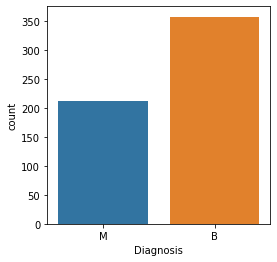

In [10]:
# Sınıf Dağılımını Saydıralım ve görüntüleyelim
print(classes.value_counts())
plt.figure(figsize=(4,4))
sns.countplot(classes,label="Vaka Sayısı")
plt.show()

Bening ve malign vaka arasında yaklaşım 1.7 katlık bir fark var bu da veri kümemizin eş dağılımlı olmadığını göstermektedir. 

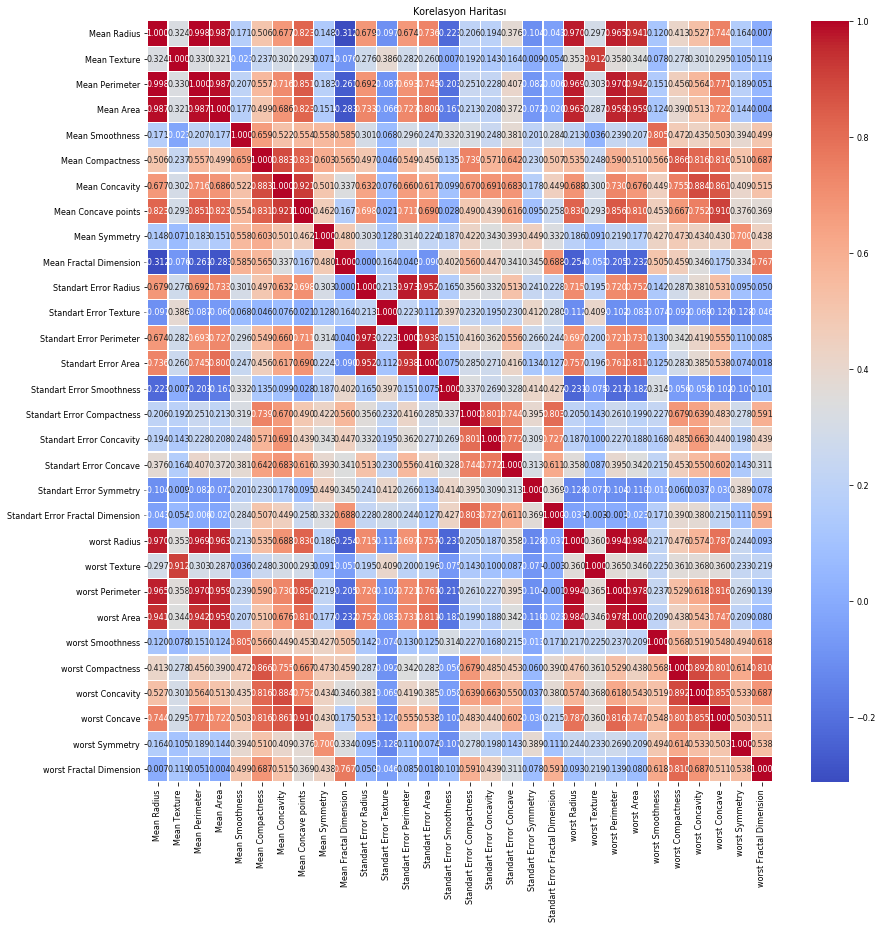

In [11]:
# Aralarında Korelasyon varmı ona bakalım
corr = features.corr()
plt.rcParams.update({'font.size': 8})
f,ax=plt.subplots(figsize = (14,14))
sns.heatmap(corr,annot= True,linewidths=0.1,fmt = ".3f",ax=ax, cmap= 'coolwarm')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('Korelasyon Haritası')
plt.savefig('graph.png')
plt.show()

In [12]:
# 0.9 ve üzeri korelasyona sahip olan nitelikleri kaldıralım

columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False
selected_columns = features.columns[columns]
features = features[selected_columns]

In [13]:
features.shape

(569, 20)

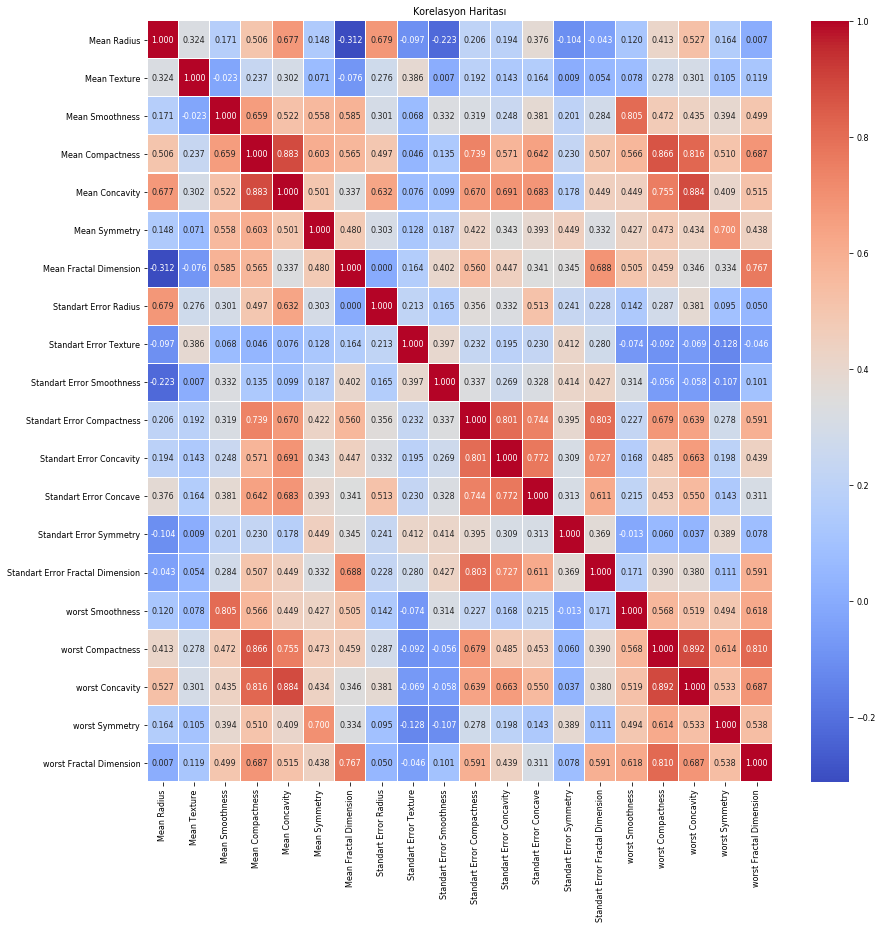

In [14]:
# Tekrar Aralarında Korelasyon varmı ona bakalım
corr = features.corr()
plt.rcParams.update({'font.size': 8})
f,ax=plt.subplots(figsize = (14,14))
sns.heatmap(corr,annot= True,linewidths=0.1,fmt = ".3f",ax=ax, cmap= 'coolwarm')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('Korelasyon Haritası')
plt.savefig('graph.png')
plt.show()

In [15]:
features.shape

(569, 20)

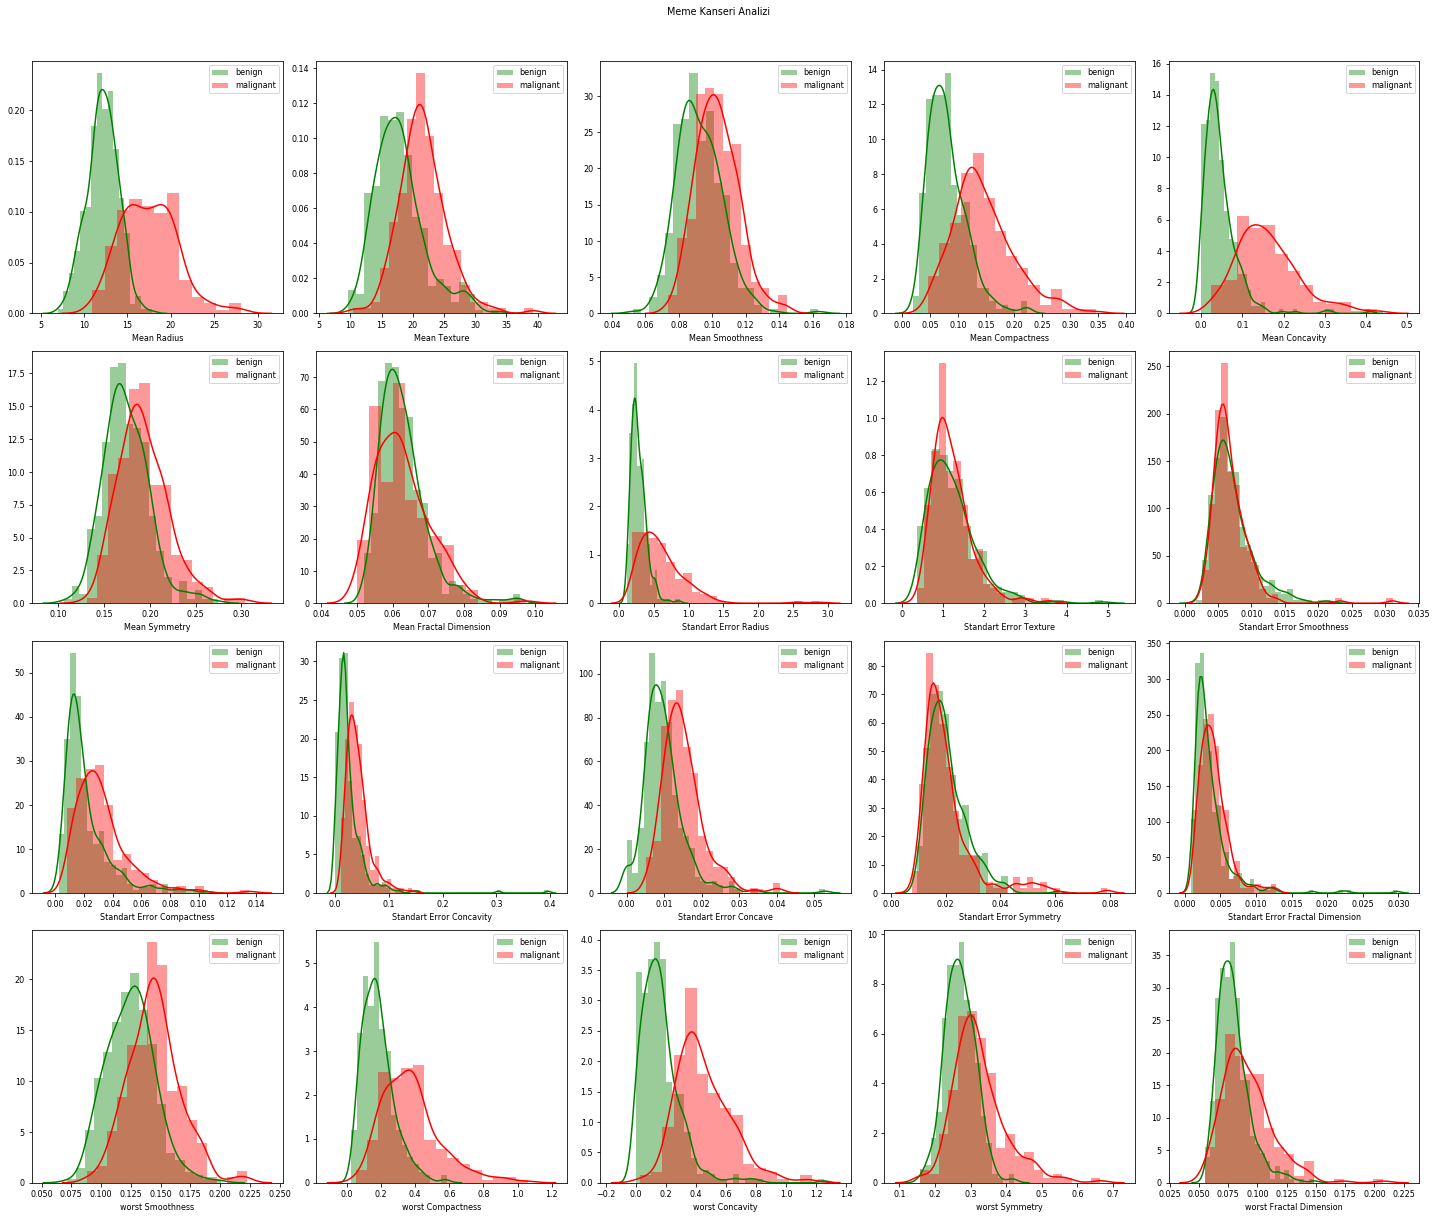

In [16]:
fig = plt.figure(figsize = (20, 25))
j = 0
for i in features.columns:
    plt.subplot(6, 5, j+1)
    j += 1
    sns.distplot(features[i][classes=="B"], color='g', label = 'benign')
    sns.distplot(features[i][classes=="M"], color='r', label = 'malignant')
    plt.legend(loc='best')
fig.suptitle('Meme Kanseri Analizi')
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()

## Adım 2 Makine Öğrenmesi

Bu kısımda makina öğrenmesi sınıflandırma işlemleri yapıyoruz

In [17]:
#kütüphaneleri yükle
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import time

Sınıflar kategorik oldukları için  hesaplamalarda kullanabilmemiz için sayısal hale dönüştürmemize ihtiyaç var bunun için biz en kolay olan LabelEncoder kullanıyoruz.  Kategorik her veriye sırasıyla sayısal bir değer ile eşleştiri. Örneğimizde  Benign :0 malign :1 


In [18]:
from sklearn.preprocessing import LabelEncoder

X = features
Y = classes
le = LabelEncoder()
y = le.fit_transform(Y)
le.transform(['M', 'B'])

array([1, 0])

## Hold Out yöntemi

Veri kümesinin eğitim ve denetleme (test) olmak üzere iki parçaya ayrıldığı yöntemdir. Denetim kümesinde kullanılan veri, eğitim kümesinin dışındaki verilerden oluştuğu için bu yönteme holdout ismi verilmektedir. yaygın olarak %80 Eğitim %20 denetim yada 70-30 olarak verilir

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.2,random_state=1)

# KNN ile Sınıflandırma

In [20]:
from sklearn.neighbors import KNeighborsClassifier

start = time.time()

clf = KNeighborsClassifier()
clf.fit(X_train, y_train)
prediction_knn = clf.predict(X_test)
scores = cross_val_score(clf, X, y, cv=5)

end = time.time()


### Hata Matrisini (Confusion Matrix) ve diğer metrikler

Makine öğrenmesinde kullanılan sınıflandırma modellerinin performansını değerlendirmek için hedef niteliğe ait tahminlerin ve gerçek değerlerin karşılaştırıldığı hata matrisi sıklıkla kullanılmaktadır. Her ne olursa olsun sınıflandırma tahminleri şu dört değerlendirmeden birine sahip olacaktır:

* 1- Doğruya doğru demek (True Positive – TP) DOĞRU
* 2- Doğruya yanlış demek (True Negative – TN) YANLIŞ
* 3- Yanlışa doğru demek (False Positive – FP) YANLIŞ
* 4- Yanlışa yanlış demek (False Negative – FN) DOĞRU

<img src="confusion_matrix.png">

<b>Doğruluk (Accuracy):</b> Doğru sınıflandırmanın toplama bölümüdür. Yani; doğrular / toplam. Yani yoka yok vara var dediklerimizin toplama oranı. Ayrıca esas köşegenin toplama oranı da diyebiliriz. Doğru olarak yapılan tahminlerin tüm tahminlere oranıdır. (Tek başına pek güvenilir bir karşılaştırma kriteri değildir). Doğruluk =  TN + TP / TOPLAM

<b>Precision:</b> Pozitif olarak tahmin edilenlerin, toplam var tahminlere oranı. TP / (FP+TP)

<b>Recall:</b> Pozitif durumların ne kadar başarılı tahmin edildiğini gösterir.
Recall = TP / (TP + FN)

<b>F-Mesure (f1 score):</b> Recall ve Precision’ın harmonik ortalaması. F-Measure = 2*Precision*Recall / (Precision + Recall)

In [21]:
print("KNN Sınıflandırıcı Doğruluğu: {0:.2%}".format(accuracy_score(prediction_knn, y_test)))
print("Cross validation skoru: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
print("Execution time: {0:.5} seconds \n".format(end-start))
cm = confusion_matrix(y_test, prediction_knn)
print("Hata Matrisi:\n",cm)
target_names = ['Benign', 'Malign']
print(classification_report(y_test, prediction_knn, target_names=target_names))

KNN Sınıflandırıcı Doğruluğu: 85.09%
Cross validation skoru: 89.63% (+/- 6.40%)
Execution time: 0.033022 seconds 

Hata Matrisi:
 [[66  6]
 [11 31]]
              precision    recall  f1-score   support

      Benign       0.86      0.92      0.89        72
      Malign       0.84      0.74      0.78        42

    accuracy                           0.85       114
   macro avg       0.85      0.83      0.84       114
weighted avg       0.85      0.85      0.85       114



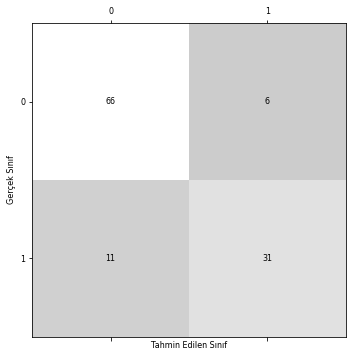

In [22]:
confmat = confusion_matrix(y_true=y_test, y_pred=prediction_knn)
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(confmat,cmap='gray',alpha=0.2)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

plt.xlabel('Tahmin Edilen Sınıf')
plt.ylabel('Gerçek Sınıf')

plt.tight_layout()
plt.savefig('breastcancer/knn.png', dpi=600)
plt.show()

# Rastgele Ağaç Sınıflandırıcı

In [23]:
from sklearn.ensemble import RandomForestClassifier

start = time.time()

clf = RandomForestClassifier()
clf.fit(X_train, y_train)
prediction_rf = clf.predict(X_test)
scores = cross_val_score(clf, X, y, cv=5)

end = time.time()

In [24]:
print("Random Forest Sınıflandırıcı Doğruluğu: {0:.2%}".format(accuracy_score(prediction_rf, y_test)))
print("Cross validation skoru: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
print("Execution time: {0:.5} seconds \n".format(end-start))
target_names = ['Benign', 'Malign']
print(classification_report(y_test, prediction_rf, target_names=target_names))

Random Forest Sınıflandırıcı Doğruluğu: 92.98%
Cross validation skoru: 95.26% (+/- 3.25%)
Execution time: 0.87995 seconds 

              precision    recall  f1-score   support

      Benign       0.92      0.97      0.95        72
      Malign       0.95      0.86      0.90        42

    accuracy                           0.93       114
   macro avg       0.93      0.91      0.92       114
weighted avg       0.93      0.93      0.93       114



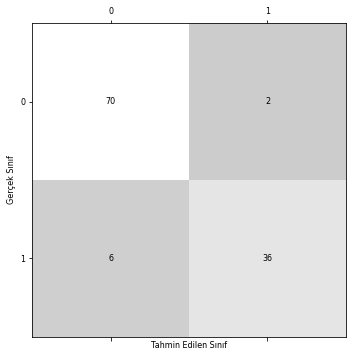

In [25]:
confmat = confusion_matrix(y_true=y_test, y_pred=prediction_rf)
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(confmat,cmap='gray',alpha=0.2)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

plt.xlabel('Tahmin Edilen Sınıf')
plt.ylabel('Gerçek Sınıf')

plt.tight_layout()
plt.savefig('breastcancer/Random Forest.png', dpi=600)
plt.show()

In [26]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [27]:
from sklearn.neighbors import KNeighborsClassifier

start = time.time()

clf = KNeighborsClassifier()
clf.fit(X_train, y_train)
prediction_knn_sc = clf.predict(X_test)
scores = cross_val_score(clf, X, y, cv=5)

end = time.time()
print("KNN Sınıflandırıcı Doğruluğu: {0:.2%}".format(accuracy_score(prediction_knn_sc, y_test)))
print("Cross validation skoru: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
print("Execution time: {0:.5} seconds \n".format(end-start))
cm = confusion_matrix(y_test, prediction_knn_sc)
print("Hata Matrisi:\n",cm)
target_names = ['Benign', 'Malign']
print(classification_report(y_test, prediction_knn_sc, target_names=target_names))

KNN Sınıflandırıcı Doğruluğu: 92.11%
Cross validation skoru: 89.63% (+/- 6.40%)
Execution time: 0.036387 seconds 

Hata Matrisi:
 [[71  1]
 [ 8 34]]
              precision    recall  f1-score   support

      Benign       0.90      0.99      0.94        72
      Malign       0.97      0.81      0.88        42

    accuracy                           0.92       114
   macro avg       0.94      0.90      0.91       114
weighted avg       0.93      0.92      0.92       114



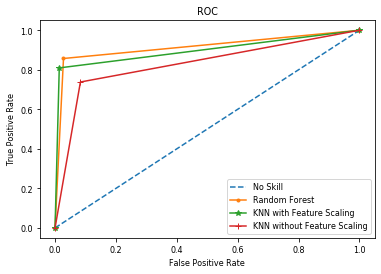

In [28]:
from sklearn.metrics import roc_curve
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test,prediction_rf)
fpr_knn_sc, tpr_knn_sc, thresholds_knn_sc = roc_curve(y_test,prediction_knn_sc)
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test,prediction_knn)
# Plot ROC curve
plt.plot([0, 1], [0, 1], linestyle='--', label='No Skill')
plt.plot(fpr_rf, tpr_rf,marker='.', label='Random Forest')
plt.plot(fpr_knn_sc, tpr_knn_sc,marker='*', label='KNN with Feature Scaling')
plt.plot(fpr_knn, tpr_knn,marker='+', label='KNN without Feature Scaling')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
# show the legend
plt.legend()
plt.show()